<a href="https://colab.research.google.com/github/seonjing/Advanced_Machine_Learning_8team/blob/main/%EC%95%84%EC%97%B0_%EB%85%BC%EB%AC%B8%EC%BD%94%EB%93%9C_%EC%B5%9C%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and Importing Requisite Packages


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
pip install dask[dataframe] --upgrade

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install pymc3

  Using cached pymc3-3.11.6-py3-none-any.whl.metadata (15 kB)
  Using cached arviz-0.15.1-py3-none-any.whl.metadata (8.5 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached deprecat-2.1.3-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached numpy-1.22.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached scipy-1.7.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
  Using cached semver-3.0.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached Theano_PyMC-1.1.2-py3-none-any.whl
INFO: pip is looking at multiple versions of arviz to determine which version is compatible with other requirements. This could take a while.
  Using cached arviz-0.15.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached arviz-0.14.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached arviz-0.13.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached arviz-

In [ ]:
!pip install pandas_datareader dask statsmodels numba seaborn plotly missingno pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached dask-2023.5.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached numba-0.58.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached lxml-5.3.0-cp38-cp38-manylinux_2_28_x86_64.whl.metadata (3.8 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached cloudpickle-3.1.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached partd-1.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached llvmlite-0.41.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.7 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached c

In [ ]:
%load_ext autoreload
%autoreload 2
# import standard libs
from IPython.display import display
from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
import datetime as dt
from datetime import timedelta
import multiprocessing as mp
from datetime import datetime
from collections import OrderedDict as od
import re
import os
import json
os.environ['THEANO_FLAGS'] = 'device=cpu,floatX=float32'

# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
from pandas import Timestamp
pd.set_option('display.max_rows', 100)
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from numba import jit
import math
import pymc3 as pm
from theano import shared, theano as tt
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from itertools import cycle
from scipy import interp

# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('seaborn-talk')
plt.style.use('bmh')

#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
#plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
#plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

# import util libs
import pyarrow as pa
import pyarrow.parquet as pq
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
import missingno as msno


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/tmp/ipykernel_17279/2794323034.py:58: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


# Defining Necessary Functions

In [ ]:
class MultiProcessingFunctions:
    """
    멀티프로세싱을 지원하는 유틸리티 클래스
    작업 분할 및 병렬 처리를 위한 정적 메서드 제공
    """

    def __init__(self):
        pass

    @staticmethod
    def lin_parts(num_atoms, num_threads):
        """
        작업(원자)을 병렬 처리를 위해 동일한 크기의 부분으로 분할합니다.

        :param num_atoms: (int) 총 작업(원자) 수
        :param num_threads: (int) 병렬 처리에 사용할 쓰레드 또는 프로세스 수
        :return: (array) 분할된 인덱스 배열
        """
        # np.linspace를 사용하여 작업을 균등하게 분할하고, 소수점을 올림하여 중복을 방지
        parts = np.linspace(0, num_atoms, min(num_threads, num_atoms) + 1)
        parts = np.ceil(parts).astype(int)
        return parts

    @staticmethod
    def nested_parts(num_atoms, num_threads, upper_triangle=False):
        """
        중첩된 루프 처리를 위한 작업(원자) 분할을 수행

        :param num_atoms: (int) 총 작업(원자) 수
        :param num_threads: (int) 병렬 처리에 사용할 쓰레드 또는 프로세스 수
        :param upper_triangle: (bool) 초기 행에 더 많은 작업 부하가 있는 경우 조정
        :return: (array) 중첩된 작업 분할 인덱스 배열
        """
        # 분할 리스트 초기화
        parts = []
        num_threads_ = min(num_threads, num_atoms)

        # 중첩 루프를 위한 작업 분할(제곱 척도 기반)
        for num in range(num_threads_):
            part = 1 + 4 * (parts[-1] ** 2 + parts[-1] + num_atoms * (num_atoms + 1.) / num_threads_)
            part = (-1 + part ** .5) / 2.
            parts.append(part)

        parts = np.round(parts).astype(int)

        # upper triangle 처리용 조정
        if upper_triangle:
            parts = np.cumsum(np.diff(parts)[::-1])
            parts = np.append(np.array([0]), parts)
        return parts

    @staticmethod
    def mp_pandas_obj(func, pd_obj, num_threads=24, mp_batches=1, lin_mols=True, **kargs):
        """
        Pandas 객체에 대해 함수 병렬화 수행

        :param func: (function) 병렬 처리할 함수
        :param pd_obj: (tuple) 첫 번째 요소는 인자 이름, 두 번째 요소는 데이터(원자 리스트)
        :param num_threads: (int) 병렬 처리에 사용할 쓰레드 수
        :param mp_batches: (int) 배치 수
        :param lin_mols: (bool) 선형 분할(lin_parts) 또는 중첩 분할(nested_parts) 여부
        :param kargs: 추가적으로 전달할 인자
        :return: (DataFrame 또는 Series) 병합된 결과
        """
        # 데이터 분할
        if lin_mols:
            parts = MultiProcessingFunctions.lin_parts(len(pd_obj[1]), num_threads * mp_batches)
        else:
            parts = MultiProcessingFunctions.nested_parts(len(pd_obj[1]), num_threads * mp_batches)

        # 작업 리스트 생성
        jobs = []
        for i in range(1, len(parts)):
            job = {pd_obj[0]: pd_obj[1][parts[i - 1]:parts[i]], 'func': func}
            job.update(kargs)
            jobs.append(job)

        # 작업을 순차적으로 또는 병렬로 처리
        if num_threads == 1:
            out = MultiProcessingFunctions.process_jobs_(jobs)
        else:
            out = MultiProcessingFunctions.process_jobs(jobs, num_threads=num_threads)

        # 결과 병합
        if isinstance(out[0], pd.DataFrame):
            df0 = pd.DataFrame()
        elif isinstance(out[0], pd.Series):
            df0 = pd.Series()
        else:
            return out

        for i in out:
            df0 = pd.concat([df0,i])

        return df0.sort_index()

    @staticmethod
    def process_jobs_(jobs):
        """
        작업을 순차적으로 실행합니다(디버깅용).

        :param jobs: (list) 작업 딕셔너리 리스트
        :return: (list) 각 작업의 결과 리스트
        """
        out = []
        for job in jobs:
            out_ = MultiProcessingFunctions.expand_call(job)
            out.append(out_)
        return out

    @staticmethod
    def expand_call(kargs):
        """
        함수 호출 시 전달할 인자 확장

        :param kargs: (dict) 함수와 그 인자를 포함한 딕셔너리
        :return: 함수 호출 결과
        """
        func = kargs['func']
        del kargs['func']
        return func(**kargs)

    @staticmethod
    def report_progress(job_num, num_jobs, time0, task):
        """
        작업 진행 상황 보고

        :param job_num: (int) 현재 작업 번호
        :param num_jobs: (int) 전체 작업 수
        :param time0: (float) 시작 시간
        :param task: (str) 현재 작업 이름
        """
        msg = [float(job_num) / num_jobs, (time.time() - time0) / 60.]
        msg.append(msg[1] * (1 / msg[0] - 1))
        time_stamp = str(dt.datetime.fromtimestamp(time.time()))
        msg = (f"{time_stamp} {round(msg[0] * 100, 2)}% {task} 완료. "
               f"{round(msg[1], 2)}분 경과. 예상 남은 시간: {round(msg[2], 2)}분.")

        sys.stderr.write(msg + ('\n' if job_num == num_jobs else '\r'))

    @staticmethod
    def process_jobs(jobs, task=None, num_threads=24):
        """
        멀티프로세싱을 사용하여 작업을 병렬 실행

        :param jobs: (list) 작업 딕셔너리 리스트
        :param task: (str) 작업 이름(선택적)
        :param num_threads: (int) 병렬로 실행할 쓰레드 수
        :return: (list) 각 작업의 결과 리스트
        """
        if task is None:
            task = jobs[0]['func'].__name__

        pool = mp.Pool(processes=num_threads)
        outputs = pool.imap_unordered(MultiProcessingFunctions.expand_call, jobs)
        out = []
        time0 = time.time()

        # 비동기 결과 처리 및 진행 상황 보고
        for i, out_ in enumerate(outputs, 1):
            out.append(out_)
            MultiProcessingFunctions.report_progress(i, len(jobs), time0, task)

        pool.close()
        pool.join()  # 메모리 누수를 방지
        return out


In [ ]:
def get_daily_vol(close, lookback=100):
    """
    일별 변동성을 계산하여 반환

    :param close: (DataFrame 또는 Series) 종가 데이터
    :param lookback: (int) 변동성을 계산할 때 사용할 과거 기간(기본값 100)
    :return: (Series) 일별 변동성 값
    """
    # 일별 변동성을 동적 임계값 계산에 사용하기 위한 메시지 출력
    print('동적 임계값을 위한 일별 변동성 계산 중...')

    # 1일 전의 인덱스 찾기 위해 타임스탬프 기준으로 검색
    df0 = close.index.searchsorted(close.index - pd.Timedelta(days=1))

    # 유효한 인덱스만 필터링 (0보다 큰 값만)
    df0 = df0[df0 > 0]

    # 이전 날의 종가를 현재 종가와 매칭 (shift 역할 수행)
    df0 = pd.Series(close.index[df0 - 1], index=close.index[close.shape[0] - df0.shape[0]:])

    # 일별 수익률 계산
    df0 = close.loc[df0.index] / close.loc[df0.values].values - 1

    # 지수 이동 표준편차 사용하여 변동성을 계산
    df0 = df0.ewm(span=lookback).std()

    return df0


In [ ]:
def get_t_events(raw_price, threshold):
    """
    Symmetric CUSUM 필터 사용하여 이벤트 발생 시점 추출

    :param raw_price: (Series) 종가 데이터
    :param threshold: (float) 절대적인 변화가 주어진 임계값(threshold)을 초과할 때 이벤트로 간주
    :return: (DatetimeIndex) 이벤트가 발생한 시점의 벡터 (이후 샘플링에 사용)
    """
    print('대칭 CUSUM 필터 적용 중...')

    # 초기화: 이벤트 시점, 양수 및 음수 CUSUM 변수
    t_events = []  # 이벤트 발생 시점 저장
    s_pos = 0  # 양의 변화 축적
    s_neg = 0  # 음의 변화 축적

    # 로그 수익률 계산
    diff = np.log(raw_price).diff().dropna()  # 로그 차이를 계산하여 수익률로 변환

    # 전체 시계열에 대해 이벤트 시점을 탐색
    for i in tqdm(diff.index[1:]):  # 첫 번째 인덱스 이후부터 반복
        pos = float(s_pos + diff.loc[i])  # 양수 변화 누적 계산
        neg = float(s_neg + diff.loc[i])  # 음수 변화 누적 계산
        s_pos = max(0.0, pos)  # 양의 변화가 0 이상일 때 유지
        s_neg = min(0.0, neg)  # 음의 변화가 0 이하일 때 유지

        # 음수 변화가 임계값을 초과한 경우
        if s_neg < -threshold:
            s_neg = 0  # CUSUM 초기화
            t_events.append(i)  # 이벤트 발생 시점 기록

        # 양수 변화가 임계값을 초과한 경우
        elif s_pos > threshold:
            s_pos = 0  # CUSUM 초기화
            t_events.append(i)  # 이벤트 발생 시점 기록

    # 이벤트 발생 시점을 DatetimeIndex로 변환하여 반환
    event_timestamps = pd.DatetimeIndex(t_events)
    return event_timestamps


In [ ]:
def add_vertical_barrier(t_events, close, num_days=1):
    """
    수직적 제한선(Vertical Barrier)을 추가하여 거래의 최대 지속 기간을 설정합니다.

    :param t_events: (Series) 대칭 CUSUM 필터를 통해 생성된 이벤트 시점 (DatetimeIndex)
    :param close: (Series) 종가 데이터
    :param num_days: (int) 거래가 활성 상태로 유지될 최대 일 수 (기본값: 1일)
    :return: (Series) 수직적 제한선의 타임스탬프
    """
    # 수직적 제한선의 위치를 이벤트 이후 일정 기간으로 설정
    t1 = close.index.searchsorted(t_events + pd.Timedelta(days=num_days))

    # 수직적 제한선의 타임스탬프가 데이터의 범위를 초과하지 않도록 제한
    t1 = t1[t1 < close.shape[0]]  # 유효한 인덱스만 유지

    # 수직적 제한선 타임스탬프를 생성하고, t_events를 인덱스로 사용
    t1 = pd.Series(close.index[t1], index=t_events[:t1.shape[0]])  # 마지막 NaN 값 처리
    return t1


In [ ]:
def apply_pt_sl_on_t1(close, events, pt_sl, molecule):
    """
    이익 실현(PT) 및 손절매(SL) 조건을 적용하여 이벤트별로 처음 해당 조건이 충족되는 시점을 계산합니다.

    :param close: (Series) 종가 데이터
    :param events: (DataFrame) 이벤트를 나타내는 인덱스와 메타데이터 (t1, trgt, side 등 포함)
    :param pt_sl: (list)
                  - pt_sl[0]: 이익 실현 수준 (Profit-Taking Level, 비율)
                  - pt_sl[1]: 손절매 수준 (Stop-Loss Level, 비율)
    :param molecule: (array) 이벤트의 특정 하위 집합에 해당하는 DatetimeIndex 배열
    :return: (DataFrame) 각 이벤트에 대해 PT 또는 SL 조건이 처음 충족된 시점의 타임스탬프
    """
    # molecule 내 이벤트 데이터를 추출
    events_ = events.loc[molecule]
    out = events_[['t1']].copy(deep=True)  # 결과를 저장할 DataFrame 생성

    # 이익 실현 수준 계산
    if pt_sl[0] > 0:
        pt = pt_sl[0] * events_['trgt']  # 목표 수익률 계산
    else:
        pt = pd.Series(index=events.index)  # NaN 값으로 채움 (PT 사용 안 함)

    # 손절매 수준 계산
    if pt_sl[1] > 0:
        sl = -pt_sl[1] * events_['trgt']  # 손절매 수준 계산
    else:
        sl = pd.Series(index=events.index)  # NaN 값으로 채움 (SL 사용 안 함)

    # 각 이벤트에 대해 PT/SL 충족 시점 탐색
    for loc, t1 in events_['t1'].fillna(close.index[-1]).items():
        # 이벤트 시작(loc)부터 종료(t1)까지의 가격 경로를 가져옴
        df0 = close[loc:t1]

        # 이벤트 시작 시점을 기준으로 수익률 계산
        df0 = (df0 / close[loc] - 1) * events_.at[loc, 'side']  # side 방향 고려

        # 손절매 조건 충족 시점 (SL)
        out.loc[loc, 'sl'] = df0[df0 < sl[loc]].index.min()  # 최초 충족 시점

        # 이익 실현 조건 충족 시점 (PT)
        out.loc[loc, 'pt'] = df0[df0 > pt[loc]].index.min()  # 최초 충족 시점

    return out


In [ ]:
def get_events(close, t_events, pt_sl, target, min_ret, num_threads,
               vertical_barrier_times=False, side=None):
    """
    Triple Barrier Method를 통해 이벤트 정의하고 메타데이터 생성

    :param close: (Series) 종가 데이터
    :param t_events: (Series) 이벤트가 발생한 시점(Timestamp)들
                     - Triple Barrier Method의 기준이 되는 진입 시점들
    :param pt_sl: (2요소 리스트)
                  - pt_sl[0]: 이익 실현(Profit Taking) 레벨 (비율)
                  - pt_sl[1]: 손절매(Stop Loss) 레벨 (비율)
                  - 0 이상의 값으로 두 수평적 장벽의 폭을 설정.
                    0이면 해당 장벽이 비활성화됨.
    :param target: (Series)
                   - 이벤트별 목표 수익률. 이 값과 `pt_sl`을 조합하여 장벽의 폭을 결정.
    :param min_ret: (float)
                    - 이벤트를 정의하기 위해 필요한 최소 목표 수익률
    :param num_threads: (int) 병렬 처리를 위해 사용하는 쓰레드 개수
    :param vertical_barrier_times: (Series) 수직 장벽의 타임스탬프
                                   - 거래가 종료될 최대 보유 기간
                                   - 기본값: 수직 장벽 비활성화
    :param side: (Series) 매수(Long)/매도(Short) 방향
                 - 지정되지 않으면 기본적으로 Long(1)으로 설정됨
    :return: (DataFrame) 이벤트 메타데이터
            - `events.index`: 이벤트의 시작 시점
            - `events['t1']`: 이벤트의 종료 시점
            - `events['trgt']`: 이벤트별 목표 수익률
            - `events['side']`: 매수(Long)/매도(Short) 방향 (지정된 경우)
    """

    # 1) 목표 수익률(target) 필터링
    # t_events와 겹치는 인덱스만 유지
    target = target.loc[target.index.intersection(t_events)]
    # 최소 수익률 조건을 만족하지 않는 이벤트 제거
    target = target[target > min_ret]

    # 2) 수직 장벽(최대 보유 기간) 설정
    if vertical_barrier_times is False:  # 수직 장벽이 지정되지 않은 경우
        vertical_barrier_times = pd.Series(pd.NaT, index=t_events)

    # 3) 이벤트 객체 생성 및 Stop Loss/Profit Taking 적용
    if side is None:  # 방향(side)이 지정되지 않은 경우
        side_ = pd.Series(1., index=target.index)  # 기본적으로 매수(Long)로 설정
        pt_sl_ = [pt_sl[0], pt_sl[0]]  # 대칭 장벽
    else:
        side_ = side.loc[target.index]  # 방향 설정
        pt_sl_ = pt_sl[:2]  # 지정된 pt_sl 값 사용

    # 이벤트 객체 생성 (수직 장벽 및 목표 수익률 포함)
    events = pd.concat({'t1': vertical_barrier_times, 'trgt': target, 'side': side_}, axis=1)
    events = events.dropna(subset=['trgt'])  # NaN 값을 가진 이벤트 제거

    # Triple Barrier Method 적용
    df0 = MultiProcessingFunctions.mp_pandas_obj(
        func=apply_pt_sl_on_t1,  # Triple Barrier 조건을 처리할 함수
        pd_obj=('molecule', events.index),  # 병렬 처리 대상 인덱스
        num_threads=num_threads,  # 쓰레드 개수
        close=close,  # 종가 데이터
        events=events,  # 이벤트 객체
        pt_sl=pt_sl_  # 이익 실현/손절매 레벨
    )

    # Triple Barrier에서 가장 먼저 충족된 조건으로 종료 시점(t1) 갱신
    events['t1'] = df0.dropna(how='all').min(axis=1)  # NaN을 무시하고 최솟값 계산

    # 방향(side)이 지정되지 않은 경우 해당 열 제거
    if side is None:
        events = events.drop('side', axis=1)

    return events


In [ ]:
def barrier_touched(out_df):
    """
    Triple Barrier Method 결과를 기반으로 수익률이 어느 장벽에 도달했는지 라벨링

    :param out_df: (DataFrame) 수익률(`ret`)과 목표값(`trgt`)이 포함된 데이터프레임
    :return: (DataFrame) 입력 데이터프레임에 라벨(`bin`)이 추가된 결과

    라벨링 기준:
    - 1: 상단 장벽(Profit Taking) 도달
    - -1: 하단 장벽(Stop Loss) 도달
    - 0: 수직 장벽(Vertical Barrier) 도달
    """
    store = []  # 각 이벤트의 라벨을 저장할 리스트

    # 각 행에 대해 라벨링 수행
    for i in np.arange(len(out_df)):
        date_time = out_df.index[i]  # 현재 행의 인덱스(타임스탬프)
        ret = out_df.loc[date_time, 'ret']  # 현재 행의 수익률
        target = out_df.loc[date_time, 'trgt']  # 현재 행의 목표값

        # 상단 장벽 도달 여부 확인
        if ret > 0.0 and ret > target:
            store.append(1)  # 상단 장벽 도달
        # 하단 장벽 도달 여부 확인
        elif ret < 0.0 and ret < -target:
            store.append(-1)  # 하단 장벽 도달
        # 수직 장벽 도달
        else:
            store.append(0)  # 수직 장벽 도달

    # 결과 라벨을 입력 데이터프레임에 추가
    out_df['bin'] = store

    return out_df


In [ ]:
def get_bins(triple_barrier_events, close):
    """
    Triple Barrier Method를 기반으로 각 이벤트의 수익률과 라벨 계산

    :param triple_barrier_events: (DataFrame)
        - `events.index`: 이벤트 시작 시간
        - `events['t1']`: 이벤트 종료 시간 (수직 장벽)
        - `events['trgt']`: 이벤트의 목표값
        - `events['side']` (선택적): 알고리즘의 매수/매도 방향 (롱/숏 포지션)
          - Case 1: 'side'가 없는 경우, 라벨은 (-1, 1)로 결정 (가격 움직임 기반)
          - Case 2: 'side'가 있는 경우, 라벨은 (0, 1)로 결정 (메타 라벨링, PnL 기반)
    :param close: (Series) 종가 데이터
    :return: (DataFrame) 메타 라벨링이 포함된 이벤트 데이터
    """
    # Step 1: 이벤트와 관련된 가격 데이터 정렬
    # 종료 시간이 유효한 이벤트만 사용
    events_ = triple_barrier_events.dropna(subset=['t1'])

    # 이벤트 시작 시간과 종료 시간을 포함한 전체 시간 집합 생성
    prices = events_.index.union(events_['t1'].values).drop_duplicates()

    # 가격 데이터를 이벤트 시간에 맞춰 정렬 (bfill 사용)
    prices = close.reindex(prices, method='bfill')

    # Step 2: 출력 데이터프레임 생성
    out_df = pd.DataFrame(index=events_.index)

    # 로그 수익률 계산 (숏 포지션의 비대칭 문제를 해결하기 위해 로그 사용)
    out_df['ret'] = np.log(prices.loc[events_['t1'].values].values) - np.log(prices.loc[events_.index])

    # 이벤트 목표값 추가
    out_df['trgt'] = events_['trgt']

    # 메타 라벨링: 'side' 정보가 있으면 수익률에 방향성 반영
    if 'side' in events_:
        out_df['ret'] = out_df['ret'] * events_['side']  # 메타 라벨링 적용

    # Step 3: 장벽 도달 여부에 따라 라벨링
    # Triple Barrier Method로 라벨링 (상단, 하단, 수직 장벽)
    out_df = barrier_touched(out_df)

    # 메타 라벨링: 잘못된 이벤트는 라벨을 0으로 설정
    if 'side' in events_:
        out_df.loc[out_df['ret'] <= 0, 'bin'] = 0  # 손실 발생 시 0으로 라벨 설정

    # Step 4: 로그 수익률을 일반 수익률로 변환
    out_df['ret'] = np.exp(out_df['ret']) - 1

    # 'side' 컬럼 추가 (메타 라벨 모델 훈련 시 유용)
    if 'side' in triple_barrier_events.columns:
        out_df['side'] = triple_barrier_events['side']

    # 최종 데이터프레임 반환
    return out_df


In [ ]:
def bbands(close_prices, window, no_of_stdev):
    """
    Bollinger Bands 계산 함수
    Bollinger Bands는 이동평균선(중심선)과 상단 및 하단 밴드를 계산하여 가격의 변동성을 시각화하는 지표

    :param close_prices: (Series) 종가 데이터
    :param window: (int) 이동 평균과 표준 편차를 계산하기 위한 윈도우 크기
    :param no_of_stdev: (float) 상단/하단 밴드를 계산할 때 사용하는 표준 편차의 배수
    :return: (tuple) 중심선(이동평균), 상단 밴드, 하단 밴드
    """

    # 이동 평균 계산
    # 기존: 단순 이동 평균 (SMA) 사용
    # rolling_mean = close_prices.rolling(window=window).mean()
    # rolling_std = close_prices.rolling(window=window).std()

    # 수정: 지수 이동 평균 (EMA) 사용
    rolling_mean = close_prices.ewm(span=window).mean()
    rolling_std = close_prices.ewm(span=window).std()

    # 상단 밴드와 하단 밴드 계산
    upper_band = rolling_mean + (rolling_std * no_of_stdev)  # 상단 밴드 = 중심선 + (표준 편차 * 배수)
    lower_band = rolling_mean - (rolling_std * no_of_stdev)  # 하단 밴드 = 중심선 - (표준 편차 * 배수)

    # 중심선, 상단 밴드, 하단 밴드 반환
    return rolling_mean, upper_band, lower_band


In [ ]:
def get_dollar_bars(time_bars, dollar_threshold):
    """
    Dollar Bars 생성 함수
    Dollar Bars는 거래 금액(달러 단위) 기준으로 일정한 거래량에 도달할 때마다 새로운 바 생성

    :param time_bars: (DataFrame 또는 List) 시간 기반 OHLCV 데이터
                      - 각 항목은 'close', 'high', 'low', 'open', 'timestamp', 'vol' 키를 포함해야 함
    :param dollar_threshold: (float) Dollar Bar를 생성하기 위한 거래 금액 임계값
    :return: (List) Dollar Bars의 리스트
             - 각 바는 'timestamp', 'open', 'high', 'low', 'close'를 포함한 사전 형태
    """

    # Dollar Bars를 저장할 리스트 초기화
    dollar_bars = []

    # 현재까지 누적된 Dollar Volume 초기화
    running_volume = 0

    # 현재까지의 최고가와 최저가 초기화
    running_high, running_low = 0, math.inf

    # 각 시간 바(Time Bar)에 대해 반복
    for i in range(len(time_bars)):

        # 다음 바의 close, high, low, open, timestamp, volume 가져오기
        next_close, next_high, next_low, next_open, next_timestamp, next_volume = [
            time_bars[i][k] for k in ['close', 'high', 'low', 'open', 'timestamp', 'vol']
        ]

        # 바의 중간 가격(midpoint price) 계산 (Open과 Close의 평균)
        midpoint_price = (next_open + next_close) / 2

        # Dollar Volume 계산: 거래량(volume) * 중간 가격(midpoint price)
        dollar_volume = next_volume * midpoint_price

        # 최고가와 최저가 업데이트
        running_high, running_low = max(running_high, next_high), min(running_low, next_low)

        # Dollar Volume이 임계값(dollar_threshold)을 초과하는 경우
        if dollar_volume + running_volume >= dollar_threshold:

            # Dollar Bar의 타임스탬프는 현재 바의 timestamp에 1분 추가
            bar_timestamp = next_timestamp + timedelta(minutes=1)

            # 새로운 Dollar Bar를 리스트에 추가
            dollar_bars += [{
                'timestamp': bar_timestamp,
                'open': next_open,
                'high': running_high,
                'low': running_low,
                'close': next_close
            }]

            # 누적 Dollar Volume 초기화
            running_volume = 0

            # 최고가와 최저가 초기화
            running_high, running_low = 0, math.inf

        # Dollar Volume이 임계값에 도달하지 않은 경우
        else:
            running_volume += dollar_volume

    # 최종적으로 생성된 Dollar Bars 반환
    return dollar_bars


In [ ]:
def plot_search_results(grid):
    """
    GridSearchCV 결과 시각화하는 함수.
    각 하이퍼파라미터의 값과 테스트 점수 간의 관계를 플롯으로 나타냄

    :param grid: (GridSearchCV 객체) 학습이 완료된 GridSearchCV 객체를 입력으로 받음.
    """
    # GridSearchCV의 결과 가져오기
    results = grid.cv_results_  # cv_results_ 속성에서 교차 검증 결과를 가져옴
    means_test = results['mean_test_score']  # 각 하이퍼파라미터 조합의 평균 테스트 점수
    stds_test = results['std_test_score']  # 각 하이퍼파라미터 조합의 테스트 점수 표준편차

    # 각 하이퍼파라미터에 해당하는 값들의 인덱스 가져오기
    masks = []  # 최적의 파라미터 설정을 기준으로 마스크 배열 생성
    masks_names = list(grid.best_params_.keys())  # 최적 파라미터 키
    for p_k, p_v in grid.best_params_.items():
        # 각 파라미터에 대해 최적 값이 일치하는 위치를 확인
        masks.append(list(results['param_' + p_k].data == p_v))

    # GridSearchCV에 설정된 파라미터 정보 가져오기
    params = grid.param_grid

    # 플롯 생성
    fig, ax = plt.subplots(1, len(params), sharex='none', sharey='all', figsize=(20, 5))
    fig.suptitle('Score per parameter')  # 플롯 제목 설정
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')  # y축 레이블 설정

    # 최적 파라미터 성능 저장 딕셔너리
    pram_preformace_in_best = {}

    for i, p in enumerate(masks_names):
        # 다른 파라미터들을 최적 값으로 고정한 상태에서 현재 파라미터에 대해 마스크 계산
        m = np.stack(masks[:i] + masks[i + 1:])
        best_parms_mask = m.all(axis=0)  # 모든 최적 조건을 만족하는 마스크 생성
        best_index = np.where(best_parms_mask)[0]  # 최적 조합에 해당하는 인덱스

        # 현재 파라미터 값(x축)과 테스트 점수(y축) 가져오기
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])

        # 플롯에 에러바 추가 (평균 점수와 표준편차 표시)
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())  # x축 레이블 설정


# Implementation

Import and Format Data

## Data Load
- 비트코인 데이터: 2018-01-01 ~ 2022-09-30 20:25:00까지 1분봉 데이터, 총 2,496,745개
- 이더리움 데이터: 2018-01-01 ~ 2022-09-30 20:25:00까지 1분봉 데이터, 총 2,496,745개

In [ ]:
## 비트코인 데이터 ##
data = pd.read_csv('BITCOIN_Price.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.tail() #  ~ 2022-09-30 20:25:00, 총 2496745

,timestamp,open,high,low,close,vol
2496741,2022-09-30 20:21:00,19475.30,19502.52,19474.00,19495.75,267.25974
2496742,2022-09-30 20:22:00,19495.75,19499.56,19473.72,19476.42,260.03094
2496743,2022-09-30 20:23:00,19475.57,19485.01,19473.00,19474.49,144.30531
2496744,2022-09-30 20:24:00,19474.45,19487.06,19470.84,19480.60,163.69283
2496745,2022-09-30 20:25:00,19481.74,19482.03,19445.00,19477.11,250.33864


In [ ]:
## 이더리움 데이터 ##
data2 = pd.read_csv('ETHBTC.csv')
data2['timestamp'] = pd.to_datetime(data2['timestamp'])
data2.head() # 2018-01-01 ~ , 총 2496745

,timestamp,open,high,low,close,vol
0,2018-01-01 00:00:00,0.053586,0.053613,0.053496,0.053520,162.312
1,2018-01-01 00:01:00,0.053522,0.053599,0.053522,0.053580,194.671
2,2018-01-01 00:02:00,0.053580,0.053580,0.053474,0.053579,228.432
3,2018-01-01 00:03:00,0.053579,0.053598,0.053519,0.053529,249.478
4,2018-01-01 00:04:00,0.053558,0.053640,0.053530,0.053621,256.474


In [ ]:
### 데이터를 리스트 형태의 딕셔너리로 변환
# dollar bar : 5 million threshold
data_dict = data.to_dict('records') # 각 row를 딕셔너리로 해서 리스트 변환
data_dict[0]

{'timestamp': Timestamp('2018-01-01 00:00:00'),
 'open': 13715.65,
 'high': 13715.65,
 'low': 13681.0,
 'close': 13707.92,
 'vol': 2.844266}

In [ ]:
# Dollar Bars를 생성하고 데이터프레임으로 변환
# 거래 금액 1,000,000에 도달할 때마다 새로운 bar 생성

# get_dollar_bars 함수를 호출하여 달러 바 생성
# data_dict: 거래 데이터(리스트 형태의 딕셔너리)
# 1,000,000: 달러 거래량 기준 (threshold)

dollar_bars = get_dollar_bars(data_dict, 1000000)
data_db = pd.DataFrame(dollar_bars)
data_db = data_db.set_index('timestamp')
data_db.head()

# open: Bar 시작 가격
# high: Bar 동안의 최고 가격
# low: Bar 동안의 최저 가격
# close: Bar 종료 가격
# timestamp: 각 Bar의 타임스태프

,open,high,low,close
timestamp,,,,
2018-01-01 00:10:00,13539.99,13715.65,13501.01,13554.58
2018-01-01 00:19:00,13440.01,13569.97,13400.01,13440.00
2018-01-01 00:31:00,13500.00,13550.87,13410.44,13500.00
2018-01-01 00:45:00,13473.00,13545.37,13450.00,13470.41
2018-01-01 00:53:00,13598.99,13690.87,13450.00,13598.99


In [ ]:
data = data.set_index('timestamp')
data2 = data2.set_index('timestamp')

# 이더리움 종가와 비트코인 데이터를 조합하여 ETH-USD 가격 계산
data['eth_close'] = data['close'].mul(data2['close']).dropna()
data.head()

,open,high,low,close,vol,eth_close
timestamp,,,,,,
2018-01-01 00:00:00,13715.65,13715.65,13681.00,13707.92,2.844266,733.647878
2018-01-01 00:01:00,13707.91,13707.91,13666.11,13694.92,2.113138,733.773814
2018-01-01 00:02:00,13682.00,13694.94,13680.00,13680.00,1.346411,732.960720
2018-01-01 00:03:00,13679.98,13679.98,13601.00,13645.99,11.589417,730.456199
2018-01-01 00:04:00,13645.98,13646.00,13576.28,13600.00,15.724566,729.245600


In [ ]:
data_db = pd.concat([data_db, data['eth_close']], join = 'inner', axis = 1)

In [ ]:
data_db.head(3)

### data_db(Dollar Bars)
# open: Bar 시작 가격
# high: Bar 동안의 최고 가격
# low: Bar 동안의 최저 가격
# close: Bar 종료 가격
### eth_close: 이더리움의 USD 환산 종가

,open,high,low,close
timestamp,,,,
2018-01-01 00:10:00,13539.99,13715.65,13501.01,13554.58
2018-01-01 00:19:00,13440.01,13569.97,13400.01,13440.00
2018-01-01 00:31:00,13500.00,13550.87,13410.44,13500.00


## [Time bar] : Model Apply

### Primary Model

Bollinger Bands를 기반으로 매수/매도 신호를 생성하고 데이터셋에 적용

In [ ]:
import copy
data_w = copy.deepcopy(data)  # 데이터를 깊은 복사하여 원본 데이터 보호

# Bollinger Bands 계산
window = 50  # 이동 평균을 계산할 윈도우 크기 (50일 기준)
data_w['avg'], data_w['upper'], data_w['lower'] = bbands(data_w['close'], window, no_of_stdev=2)
# 'avg': 이동 평균 값
# 'upper': 상단 밴드 (이동 평균 + 2표준편차)
# 'lower': 하단 밴드 (이동 평균 - 2표준편차)

# 매수/매도 신호 계산
data_w['side'] = np.nan  # 초기 신호를 NaN으로 설정
long_signals = (data_w['close'] <= data_w['lower'])  # 매수 신호: 종가가 하단 밴드보다 작거나 같을 때
short_signals = (data_w['close'] >= data_w['upper'])  # 매도 신호: 종가가 상단 밴드보다 크거나 같을 때
data_w.loc[long_signals, 'side'] = 1  # 매수 신호를 '1'로 설정
data_w.loc[short_signals, 'side'] = -1  # 매도 신호를 '-1'로 설정

print(data_w.side.value_counts())  # 매수/매도 신호의 개수 출력

# 시그널로 인해 발생할 수 있는 미래 정보 사용 편향 제거
data_w['side'] = data_w['side'].shift(1)  # 신호를 한 스텝 뒤로 이동하여 편향 제거

# 데이터셋에서 NaN 값 제거
data_w.dropna(axis=0, how='any', inplace=True)  # NaN이 있는 행은 모두 삭제


side
 1.0    35364
-1.0    32744
Name: count, dtype: int64


In [ ]:
### data_w: Bollinger Bands를 기반으로 신호를 생성한 상태
# close: 종가
# avg: 이동 평균
# upper: 상단 밴드
# lower: 하단 밴드
# side: 매수(1) 또는 매도(-1) 신호

data_w.head(5)

,open,high,low,close,vol,eth_close,avg,upper,lower,side
timestamp,,,,,,,,,,
2018-01-01 01:11:00,13433.34,13469.99,13404.14,13469.99,7.623139,724.389122,13504.677391,13597.049278,13412.305503,1.0
2018-01-01 01:48:00,13401.09,13405.00,13380.62,13380.68,4.590436,724.818055,13491.678479,13612.794857,13370.562100,1.0
2018-01-01 01:56:00,13230.34,13257.98,13200.81,13230.42,9.497591,719.589313,13443.538352,13642.715890,13244.360813,1.0
2018-01-01 01:57:00,13230.42,13230.42,13186.00,13215.00,7.872177,719.979630,13434.495495,13649.450946,13219.540045,1.0
2018-01-01 01:58:00,13200.00,13215.00,13155.38,13202.00,15.537332,718.875304,13425.299304,13654.999463,13195.599145,1.0


### Implement Triple Barriers
- 주요 이벤트 탐지, 가격 변동성 및 방향성 정보 활용해 학습 데이터로 사용할 이벤트 라벨링 수행

In [ ]:
close = data_w['close']  # 종가 데이터 추출

# 최근 50일 데이터를 사용하여 일일 변동성 계산
daily_vol = get_daily_vol(close=close, lookback=50)
# get_daily_vol 함수는 lookback 기간 동안의 종가 변동성을 계산하여 반환

# CUSUM 필터를 사용하여 이벤트 트리거 생성
cusum_events = get_t_events(close, threshold=daily_vol.mean()*0.1)
# CUSUM 필터는 종가의 누적 변화가 설정된 임계값을 초과할 때 이벤트를 생성
# threshold: 평균 변동성의 10%를 기준으로 설정

# 수직적 장벽 추가 (0.5일 만료기간 설정)
vertical_barriers = add_vertical_barrier(
    t_events=cusum_events,  # 생성된 CUSUM 이벤트
    close=close,            # 종가 데이터
    num_days=0.5            # 수직 장벽 만료 시간: 0.5일
)

# 첫 번째 접촉의 타임스탬프 결정 (Triple Barrier Method)
pt_sl = [1, 2]  # 이익 실현(pt, profit-take) 1%, 손실 제한(sl, stop-loss) 2%로 설정
min_ret = 0.0005  # 최소 수익률을 0.05%로 설정

# Triple Barrier Method를 사용하여 이벤트 생성
triple_barrier_events = get_events(
    close=close,                      # 종가 데이터
    t_events=cusum_events,            # CUSUM 이벤트
    pt_sl=pt_sl,                      # 이익 실현 및 손실 제한 비율
    target=daily_vol,                 # 변동성 목표 (일일 변동성)
    min_ret=min_ret,                  # 최소 수익률 (0.05%)
    num_threads=2,                    # 멀티스레드를 위한 스레드 수 설정
    vertical_barrier_times=vertical_barriers,  # 수직 장벽 타임스탬프
    side=data_w['side']               # 방향 데이터 (매수/매도 신호)
)


동적 임계값을 위한 일별 변동성 계산 중...
대칭 CUSUM 필터 적용 중...



2024-12-07 13:45:59.829192 100.0% apply_pt_sl_on_t1 완료. 0.31분 경과. 예상 남은 시간: 0.0분.
5it/s]

In [ ]:
# t1: 이벤트 종료 시점(상단, 하단, 수직 장벽 중 하나에 의해 종료)
# trgt: 목표 수익률(각 이벤트의 목표 수익률, daily_vol에 의해 계산)
# side: 방향(1-매수 방향, -1-매도 방향)

triple_barrier_events.head(5)

,t1,trgt,side
2018-01-02 02:25:00,2018-01-02 04:27:00,0.007052,1.0
2018-01-02 02:26:00,2018-01-02 03:14:00,0.004937,1.0
2018-01-02 03:14:00,2018-01-02 04:28:00,0.008104,1.0
2018-01-02 04:27:00,2018-01-02 09:08:00,0.020524,1.0
2018-01-02 04:28:00,2018-01-02 09:08:00,0.022913,1.0


Add Labels

In [ ]:
# get_bins 함수: Triple Barrier Method 결과 기반으로 이벤트 라벨(bin) 생성
# bin: 1(상단 장벽 도달, 수익), -1(하단 장벽 도달, 손실), 0(수직 장변 도달, 중립)

labels = get_bins(triple_barrier_events, data_w['close'])
labels.side.value_counts() # 매수: 15843, 매도: 14131

side
 1.0    15843
-1.0    14131
Name: count, dtype: int64

In [ ]:
# ret: 이벤트 종료 시점의 실제 수익률
# trgt: 목표 수익률(일일 변동성 기반)
# bin: 이벤트의 결과를 나타내는 라벨(1: 수익, -1: 손실, 0: 중립)
# side: 매수/매도 신호(1: 매수, -1: 매도).

labels.head(5)

,ret,trgt,bin,side
2018-01-02 02:25:00,-0.021401,0.007052,0,1.0
2018-01-02 02:26:00,-0.013614,0.004937,0,1.0
2018-01-02 03:14:00,-0.016521,0.008104,0,1.0
2018-01-02 04:27:00,0.025440,0.020524,1,1.0
2018-01-02 04:28:00,0.029350,0.022913,1,1.0


### Evaluating Primary Model
- Triple Barrier Method로 생성된 라벨(bin) 데이터 활용하여 간단한 기본 모델 구축 및 평가

In [ ]:
# bin 레이블만 포함하는 데이터프레임 생성
primary_forecast = pd.DataFrame(labels['bin'])
# 'labels'에서 'bin' 열만 가져와 새로운 데이터프레임 생성
# 'bin'은 Triple Barrier Method의 결과로 생성된 레이블 (예: 1, -1, 0 등)

# 예측값(predicted column)을 1로 설정
primary_forecast['pred'] = 1
# 모든 예측값(pred)을 1(매수 신호)로 설정 (기본값)

# 열 이름 변경
primary_forecast.columns = ['actual', 'pred']
# 'bin' 열 이름을 'actual'(실제 값)로 변경
# 'pred' 열은 예측 값(모두 1로 설정)

# 성능 지표 계산
actual = primary_forecast['actual']  # 실제 레이블 (actual 값)
pred = primary_forecast['pred']      # 예측 레이블 (pred 값)

# 분류 성능 보고서 출력 (Precision, Recall, F1-Score 등)
print(classification_report(y_true=actual, y_pred=pred))
# y_true: 실제 값 (actual)
# y_pred: 예측 값 (pred)

# 혼동 행렬 출력
print("Confusion Matrix")
print(confusion_matrix(actual, pred))
# Confusion Matrix: 실제 값과 예측 값의 분포를 보여줌

# 정확도 계산 및 출력
print('')
print("Accuracy")
print(accuracy_score(actual, pred))
# Accuracy: 정확도를 계산하여 출력


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23141
           1       0.23      1.00      0.37      6833

    accuracy                           0.23     29974
   macro avg       0.11      0.50      0.19     29974
weighted avg       0.05      0.23      0.08     29974

Confusion Matrix
[[    0 23141]
 [    0  6833]]

Accuracy
0.22796423567091478


#### Graph
- Triple Barrier Method에서 생성된 레이블이 1(매수 신호)인 데이터를 무작위로 선택해 서브플롯을 사용하여 각 이벤트의 가격 변화와 Bollinger Bands를 시각화

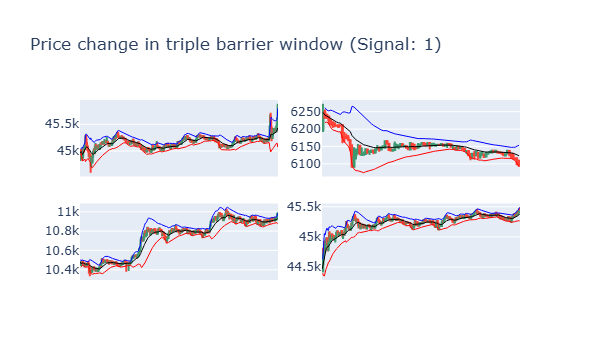

In [ ]:
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 서브플롯 행과 열의 개수 설정
n = 2; m = 2  # 서브플롯 행(n)과 열(m)의 개수를 설정

# 레이블이 1인 데이터만 필터링
label_1 = labels[labels['bin'] == 1]
# Triple Barrier Method 결과에서 레이블(bin)이 1(매수 신호)인 데이터만 필터링

# 레이블이 1인 데이터에서 무작위로 n * m 개의 인덱스를 샘플링
random.seed(42)  # 난수 시드 고정
list_1 = random.sample(list(label_1.index), k=n*m)
# 레이블이 1인 데이터 중 k개의 인덱스를 무작위로 선택

# n x m 개의 서브플롯 생성
fig = make_subplots(rows=n, cols=m)

# 무작위로 선택된 인덱스를 기반으로 서브플롯 생성
for idx, st in enumerate(list_1):  # 선택된 인덱스 반복
    et = triple_barrier_events.loc[st]['t1']  # 이벤트의 종료 시간(t1) 가져오기
    gr_dt = data.loc[st:et]  # 이벤트 시작(st)부터 종료(et)까지의 데이터 가져오기

    # Bollinger Bands 계산 (20일 이동 평균 기준)
    avg, upper, lower = bbands(gr_dt['close'], 20, no_of_stdev=2)

    # 서브플롯에 캔들차트 추가
    fig.add_trace(
        go.Candlestick(
            x=gr_dt.index, open=gr_dt.open, high=gr_dt.high, low=gr_dt.low, close=gr_dt.close
        ),
        row=idx//n + 1, col=idx%m + 1  # 서브플롯의 행과 열 위치 계산
    )

    # 서브플롯에 Bollinger Bands 추가
    fig.add_trace(
        go.Scatter(x=gr_dt.index, y=avg, line=dict(color='black', width=1)),  # 이동 평균
        row=idx//n + 1, col=idx%m + 1
    )
    fig.add_trace(
        go.Scatter(x=gr_dt.index, y=upper, line=dict(color='blue', width=1)),  # 상단 밴드
        row=idx//n + 1, col=idx%m + 1
    )
    fig.add_trace(
        go.Scatter(x=gr_dt.index, y=lower, line=dict(color='red', width=1)),  # 하단 밴드
        row=idx//n + 1, col=idx%m + 1
    )

    # x축 슬라이더 및 눈금 비활성화
    fig.update_xaxes(rangeslider_visible=False, visible=False)

# 전체 그래프 레이아웃 설정
fig.update_layout(title='Price change in triple barrier window (Signal: 1)') # 그래프 제목 설정
fig.update_traces(showlegend=False)  # 범례 숨기기
fig.show()  # 그래프 출력


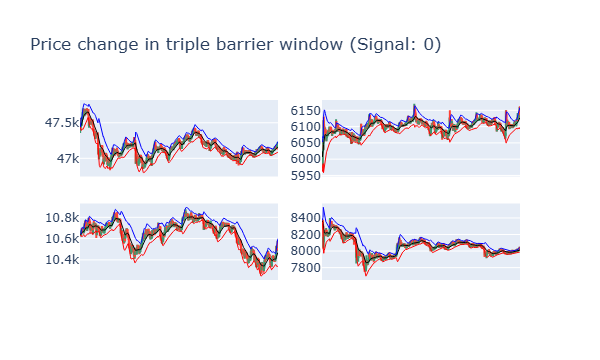

In [ ]:
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 서브플롯 행과 열의 개수 설정
n = 2; m = 2  # 서브플롯 행(n)과 열(m)의 개수를 설정

# 레이블이 0인 데이터만 필터링
label_1 = labels[labels['bin'] == 0]
# Triple Barrier Method 결과에서 레이블(bin)이 0인 데이터만 필터링
# 레이블 0은 수직 장벽에 도달한 중립적인 이벤트를 의미

# 레이블이 0인 데이터에서 무작위로 n * m 개의 인덱스를 샘플링
random.seed(42)  # 난수 시드 고정
list_1 = random.sample(list(label_1.index), k=n*m)
# 레이블이 0인 데이터 중 k개의 인덱스를 무작위로 선택

# n x m 개의 서브플롯 생성
fig = make_subplots(rows=n, cols=m)

# 무작위로 선택된 인덱스를 기반으로 서브플롯 생성
for idx, st in enumerate(list_1):  # 선택된 인덱스 반복
    et = triple_barrier_events.loc[st]['t1']  # 이벤트의 종료 시간(t1) 가져오기
    gr_dt = data.loc[st:et]  # 이벤트 시작(st)부터 종료(et)까지의 데이터 가져오기

    # Bollinger Bands 계산 (20일 이동 평균 기준)
    avg, upper, lower = bbands(gr_dt['close'], 20, no_of_stdev=2)

    # 서브플롯에 캔들차트 추가
    fig.add_trace(
        go.Candlestick(
            x=gr_dt.index, open=gr_dt.open, high=gr_dt.high, low=gr_dt.low, close=gr_dt.close
        ),
        row=idx//n + 1, col=idx%m + 1  # 서브플롯의 행과 열 위치 계산
    )

    # 서브플롯에 Bollinger Bands 추가
    fig.add_trace(
        go.Scatter(x=gr_dt.index, y=avg, line=dict(color='black', width=1)),  # 이동 평균
        row=idx//n + 1, col=idx%m + 1
    )
    fig.add_trace(
        go.Scatter(x=gr_dt.index, y=upper, line=dict(color='blue', width=1)),  # 상단 밴드
        row=idx//n + 1, col=idx%m + 1
    )
    fig.add_trace(
        go.Scatter(x=gr_dt.index, y=lower, line=dict(color='red', width=1)),  # 하단 밴드
        row=idx//n + 1, col=idx%m + 1
    )

    # x축 슬라이더 및 눈금 비활성화
    fig.update_xaxes(rangeslider_visible=False, visible=False)

# 전체 그래프 레이아웃 설정
fig.update_layout(title='Price change in triple barrier window (Signal: 0)')  # 그래프 제목 설정
fig.update_traces(showlegend=False)  # 범례 숨기기
fig.show()  # 그래프 출력


In [ ]:
labels['bin'].value_counts()

bin
0    23141
1     6833
Name: count, dtype: int64

### Secondary Model

In [ ]:
data_w.head(5)

,open,high,low,close,vol,eth_close,avg,upper,lower,side
timestamp,,,,,,,,,,
2018-01-01 01:11:00,13433.34,13469.99,13404.14,13469.99,7.623139,724.389122,13504.677391,13597.049278,13412.305503,1.0
2018-01-01 01:48:00,13401.09,13405.00,13380.62,13380.68,4.590436,724.818055,13491.678479,13612.794857,13370.562100,1.0
2018-01-01 01:56:00,13230.34,13257.98,13200.81,13230.42,9.497591,719.589313,13443.538352,13642.715890,13244.360813,1.0
2018-01-01 01:57:00,13230.42,13230.42,13186.00,13215.00,7.872177,719.979630,13434.495495,13649.450946,13219.540045,1.0
2018-01-01 01:58:00,13200.00,13215.00,13155.38,13202.00,15.537332,718.875304,13425.299304,13654.999463,13195.599145,1.0


In [ ]:
# 이벤트 발생 날짜에 해당하는 특성(feature) 추출
X = data_w.loc[labels.index]
# labels의 인덱스(이벤트 발생 시점)를 기준으로 data_w에서 데이터를 가져옴

# 상대적 변동성 지수(RVI) 계산
X['rvi'] = (X['open'] - X['close']) / (X['high'] - X['low'])
# RVI(Relative Volatility Index): 고가-저가 대비 시가-종가의 비율을 계산

# 필요한 열만 선택하여 최종 특성 데이터 생성
X = X.loc[:, ['close', 'eth_close', 'side', 'rvi']]
# 'close': 종가
# 'eth_close': 이더리움의 종가
# 'side': 매수/매도 방향
# 'rvi': 상대적 변동성 지수

# 레이블 데이터 설정
y = labels['bin']
# 레이블 값은 Triple Barrier Method로 생성된 'bin' (1, -1, 0)

# 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# train_test_split을 사용하지 않고 연도별로 데이터를 나눔

# 학습 데이터 (2022년 이전)
X_train = X[X.index.year < 2022]
y_train = y[y.index.year < 2022]

# 테스트 데이터 (2022년)
X_test = X[X.index.year == 2022]
y_test = y[y.index.year == 2022]


In [ ]:
# 'close': 종가
# 'eth_close': 이더리움의 종가
# 'side': 매수/매도 방향
# 'rvi': 상대적 변동성 지수

X.head(5)

,close,eth_close,side,rvi
2018-01-02 02:25:00,13437.52,872.027860,1.0,-0.244565
2018-01-02 02:26:00,13503.90,882.803959,1.0,-0.827935
2018-01-02 03:14:00,13320.06,827.268966,1.0,0.298206
2018-01-02 04:27:00,13149.95,834.153928,1.0,0.800520
2018-01-02 04:28:00,13100.00,832.243000,1.0,0.543793


In [ ]:
print(y_train.value_counts()) # 하단 장벽에 도달한 이벤트가 없어서 bin=-1인 값이 없다
print(y_test.value_counts())

bin
0    19802
1     5700
Name: count, dtype: int64
bin
0    3339
1    1133
Name: count, dtype: int64


In [ ]:
X_train.head(3)

,close,eth_close,side,rvi
2018-01-02 02:25:00,13437.52,872.027860,1.0,-0.244565
2018-01-02 02:26:00,13503.90,882.803959,1.0,-0.827935
2018-01-02 03:14:00,13320.06,827.268966,1.0,0.298206


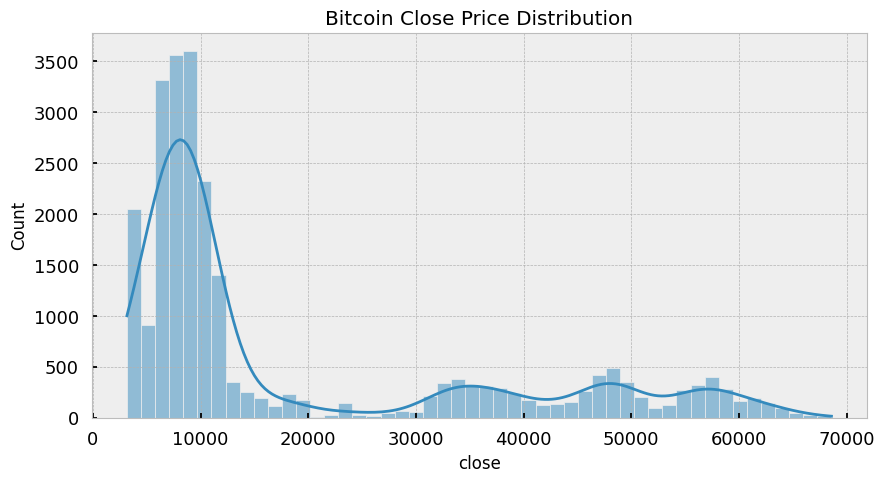

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 비트코인 종가 데이터 히스토그램
plt.figure(figsize=(10, 5))
sns.histplot(X_train['close'], kde=True, bins=50)
plt.title('Bitcoin Close Price Distribution')
plt.show()


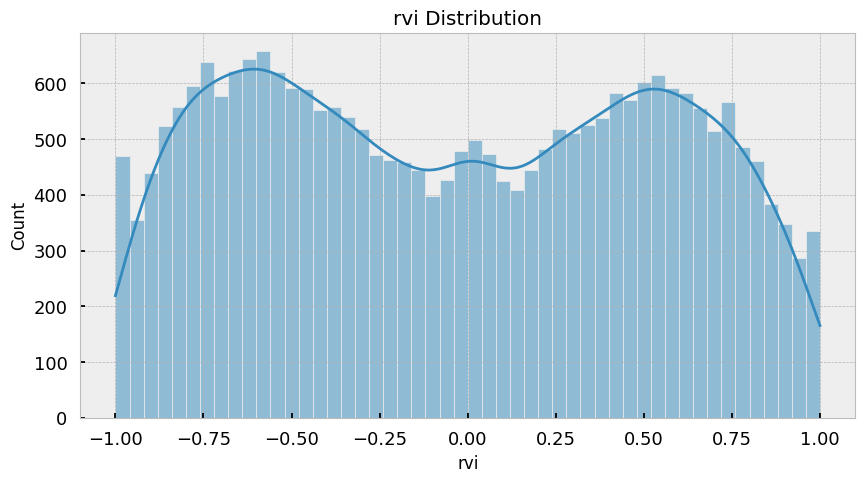

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# rvi 데이터 히스토그램
plt.figure(figsize=(10, 5))
sns.histplot(X_train['rvi'], kde=True, bins=50)
plt.title('rvi Distribution')
plt.show()


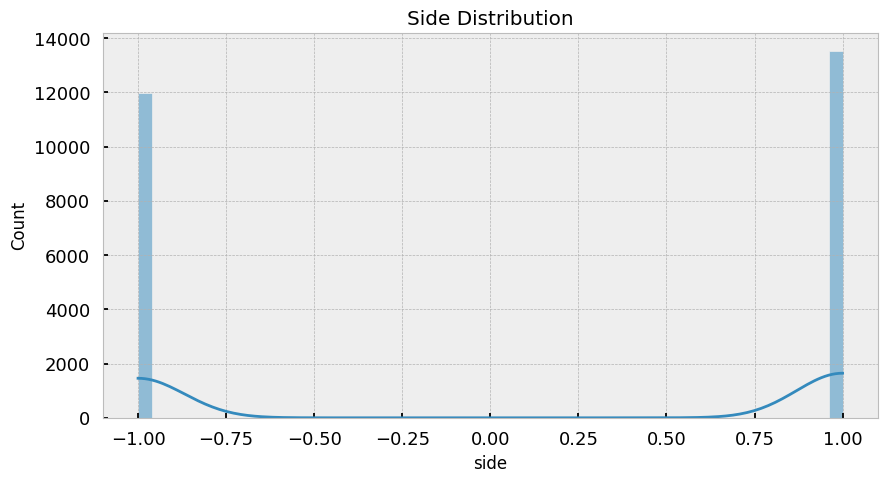

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# side 데이터 히스토그램
plt.figure(figsize=(10, 5))
sns.histplot(X_train['side'], kde=True, bins=50)
plt.title('Side Distribution')
plt.show()


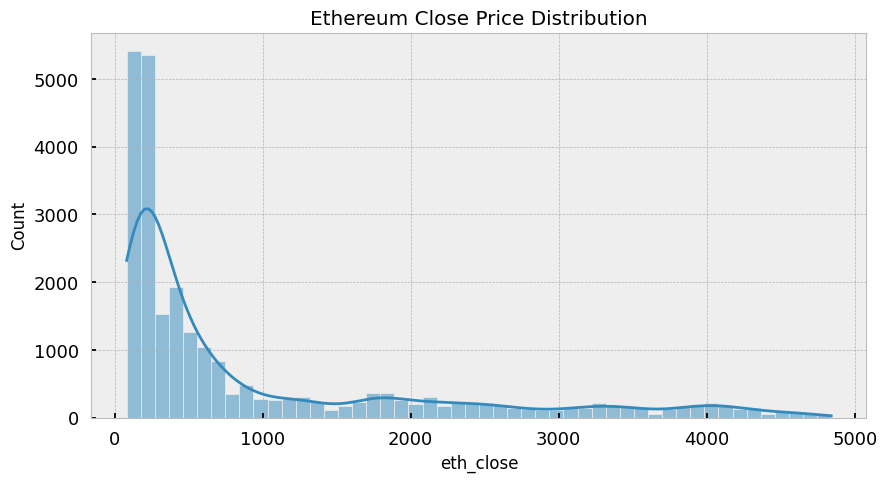

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 이더리움 종가 데이터 히스토그램
plt.figure(figsize=(10, 5))
sns.histplot(X_train['eth_close'], kde=True, bins=50)
plt.title('Ethereum Close Price Distribution')
plt.show()


In [ ]:
# 비트코인, 이더리움 데이터는 robustscaler(극단값의 영향 최소화)
# rvi는 standardscaler

from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler를 적용할 변수
robust_features = ['close', 'eth_close']
rs = RobustScaler()
X_train_robust = pd.DataFrame(rs.fit_transform(X_train[robust_features]), columns=robust_features)
X_test_robust = pd.DataFrame(rs.transform(X_test[robust_features]), columns=robust_features)

# StandardScaler를 적용할 변수
standard_features = ['rvi']
ss = StandardScaler()
X_train_standard = pd.DataFrame(ss.fit_transform(X_train[standard_features]), columns=standard_features)
X_test_standard = pd.DataFrame(ss.transform(X_test[standard_features]), columns=standard_features)

# 'side' 변수 그대로 사용
X_train_side = X_train[['side']].reset_index(drop=True)
X_test_side = X_test[['side']].reset_index(drop=True)

# 최종 데이터 통합
X_train_scaled = pd.concat([X_train_robust, X_train_standard, X_train_side], axis=1)
X_test_scaled = pd.concat([X_test_robust, X_test_standard, X_test_side], axis=1)

In [ ]:
print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)

(25502, 4) (25502,)
(4472, 4) (4472,)


#### Decision Tree (Creating Secondary Model)

Grid Search

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# GridSearchCV의 하이퍼파라미터 설정
grid_params = {
    'criterion': ['entropy', 'gini'],
    'max_depth': list(range(1, 20))  # 탐색 범위를 1-20으로 설정
}

# 결정 트리 모델 및 GridSearch 설정
dt = DecisionTreeClassifier(random_state=0)
gs = GridSearchCV(estimator=dt, param_grid=grid_params, cv=5, scoring='roc_auc')

# 모델 학습
gs.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 및 결과 출력
print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Test Score : ", gs.score(X_test_scaled, y_test))

Best Parameters :  {'criterion': 'gini', 'max_depth': 1}
Best Score :  0.501530789431406
Test Score :  0.5


In [ ]:
from sklearn import tree
###########
# Setting random forest parameters

clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 1)

# Fitting our model
clf.fit(X_train_scaled, y_train)

# Performance Metrics
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      3339
           1       0.00      0.00      0.00      1133

    accuracy                           0.75      4472
   macro avg       0.37      0.50      0.43      4472
weighted avg       0.56      0.75      0.64      4472

Confusion Matrix
[[3339    0]
 [1133    0]]

Accuracy
0.7466457960644007


#### Random Forest (Creating Secondary Model)

In [ ]:
###########
# Setting random forest parameters
n_estimator = 100
depth = 20
RANDOM_STATE = 0

clf = RandomForestClassifier(max_depth=depth, n_estimators=n_estimator,
                            criterion='entropy', class_weight='balanced_subsample',
                            random_state=RANDOM_STATE)

# Fitting our model
clf.fit(X_train_scaled, y_train)


# Performance Metrics
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83      3339
           1       0.25      0.07      0.10      1133

    accuracy                           0.71      4472
   macro avg       0.50      0.50      0.47      4472
weighted avg       0.62      0.71      0.65      4472

Confusion Matrix
[[3111  228]
 [1058   75]]

Accuracy
0.712432915921288


Grid Search for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Setting random forest parameters
RANDOM_STATE = 0

# Fitting our model

grid_params = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [5, 10, 15, 30, 50, 100]
}

rf = RandomForestClassifier()
gs = GridSearchCV(rf, grid_params, cv=5, scoring='roc_auc', n_jobs=-1)
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [5, 10, 15, 30, 50, 100]},
             scoring='roc_auc')

In [ ]:
print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test_scaled, y_test))

print(pd.DataFrame(gs.cv_results_))

Best Parameters :  {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 5}
Best Score :  0.4748462012753891
Best Test Score :  0.4800194920180265
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.002754      0.000125         0.000000        0.000000   
1         0.002648      0.000116         0.000000        0.000000   
2         0.002529      0.000045         0.000000        0.000000   
3         0.002510      0.000042         0.000000        0.000000   
4         0.002520      0.000085         0.000000        0.000000   
..             ...           ...              ...             ...   
139       1.630102      0.057438         0.014310        0.001299   
140       2.387167      0.142371         0.018389        0.001553   
141       4.860544      0.265419         0.030468        0.003093   
142       7.894338      0.453986         0.043930        0.006178   
143      12.429322      1.424684         0.065810        0.007774   



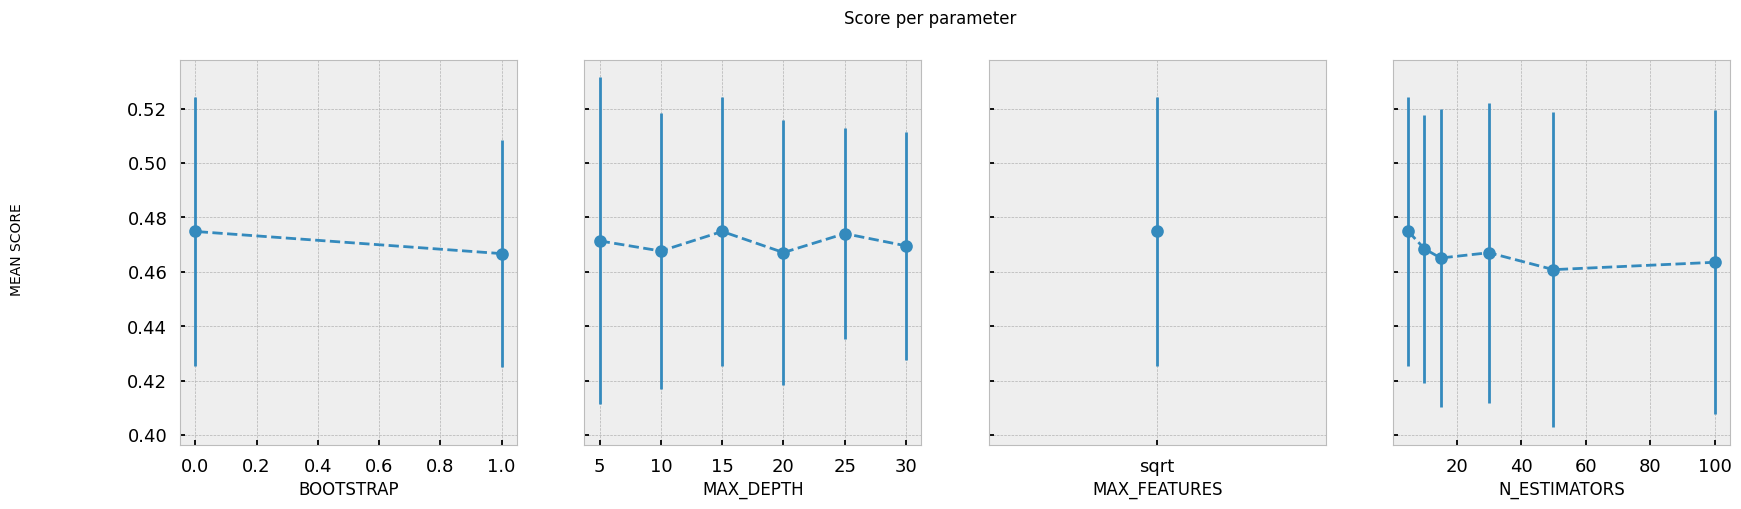

In [ ]:
plot_search_results(gs)

In [ ]:
###########
# Setting random forest parameters
n_estimator = 5
RANDOM_STATE = 0

clf = RandomForestClassifier(max_depth=15, n_estimators=5,bootstrap = False, max_features = 'sqrt',
                             random_state=RANDOM_STATE)

# Fitting our model
clf.fit(X_train_scaled, y_train)


# Performance Metrics
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      3339
           1       0.23      0.02      0.03      1133

    accuracy                           0.74      4472
   macro avg       0.49      0.50      0.44      4472
weighted avg       0.62      0.74      0.64      4472

Confusion Matrix
[[3269   70]
 [1112   21]]

Accuracy
0.7356887298747764


#### KNN (Creating Secondary Model)

Grid Search for KNN

In [ ]:
# Grid serach for KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = {
    'n_neighbors' : list(range(3,31)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, grid_params, cv=5, scoring='roc_auc', n_jobs=-1)
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [ ]:
print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test_scaled, y_test))

print(pd.DataFrame(gs.cv_results_))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score :  0.48330131522688224
Best Test Score :  0.49810710142272696
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.026037      0.001582         0.055618        0.006729   
1         0.026914      0.002403         0.056913        0.007225   
2         0.027098      0.000866         0.059213        0.007812   
3         0.027237      0.001023         0.059459        0.007349   
4         0.026470      0.000298         0.061909        0.007733   
..             ...           ...              ...             ...   
163       0.027154      0.000751         0.121943        0.020656   
164       0.027079      0.001223         0.121068        0.019557   
165       0.027483      0.001284         0.122986        0.018764   
166       0.026496      0.000287         0.125397        0.020647   
167       0.026798      0.000520         0.108823        0.009863   

    param_metri

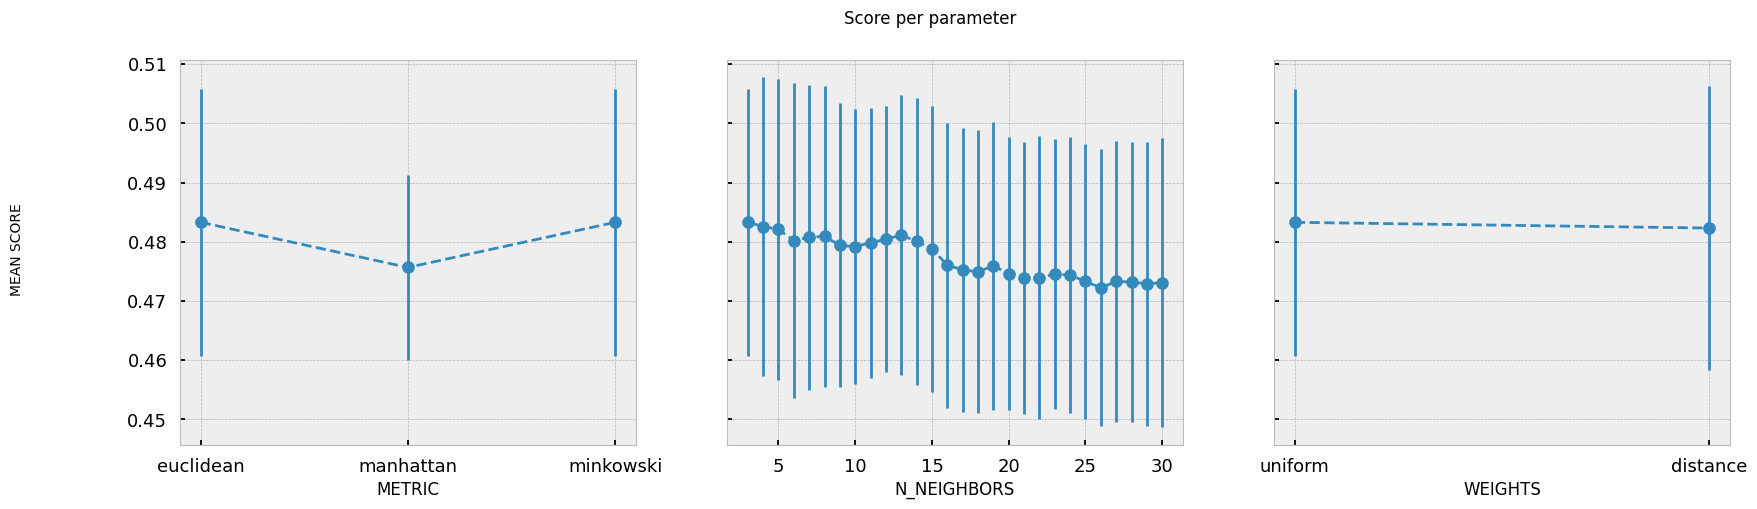

In [ ]:
plot_search_results(gs)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


#  활용
clf = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', weights = 'uniform')

# Fitting our model
clf.fit(X_train_scaled, y_train)

# Performance Metrics
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      3339
           1       0.26      0.14      0.19      1133

    accuracy                           0.68      4472
   macro avg       0.51      0.50      0.49      4472
weighted avg       0.63      0.68      0.65      4472

Confusion Matrix
[[2888  451]
 [ 971  162]]

Accuracy
0.6820214669051878


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


#  활용
clf = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean', weights = 'uniform')

# Fitting our model
clf.fit(X_train_scaled, y_train)

# Performance Metrics
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      3339
           1       0.29      0.06      0.10      1133

    accuracy                           0.72      4472
   macro avg       0.52      0.50      0.47      4472
weighted avg       0.63      0.72      0.65      4472

Confusion Matrix
[[3164  175]
 [1063   70]]

Accuracy
0.7231663685152058


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


#  활용
clf = KNeighborsClassifier(n_neighbors = 30, metric = 'euclidean', weights = 'uniform')

# Fitting our model
clf.fit(X_train_scaled, y_train)

# Performance Metrics
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      3339
           1       0.00      0.00      0.00      1133

    accuracy                           0.75      4472
   macro avg       0.37      0.50      0.43      4472
weighted avg       0.56      0.75      0.64      4472

Confusion Matrix
[[3339    0]
 [1133    0]]

Accuracy
0.7466457960644007


#### Graph

In [ ]:
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

# 교차 검증을 수행하여 예측값과 실제값 반환
def cross_val_predict(model, kfold: KFold, X: np.array, y: np.array) -> Tuple[np.array, np.array, np.array]:
    """
    주어진 모델과 데이터에 대해 K-Fold 교차 검증을 수행하여 예측 결과를 반환하는 함수.

    :param model: (object) 학습할 모델 객체
    :param kfold: (KFold) 교차 검증 설정 (KFold 객체)
    :param X: (np.array) 입력 데이터
    :param y: (np.array) 타겟(레이블) 데이터
    :return: (Tuple[np.array, np.array, np.array])
             - actual_classes: 실제 클래스 레이블
             - predicted_classes: 모델이 예측한 클래스 레이블
             - predicted_proba: 모델이 예측한 클래스별 확률값
    """

    # 모델의 복사본 생성 (원본 모델 보존)
    model_ = cp.deepcopy(model)

    # 타겟 데이터(y)에 있는 클래스 개수
    no_classes = len(np.unique(y))

    # 결과를 저장할 배열 초기화
    actual_classes = np.empty([0], dtype=int)  # 실제 클래스 레이블 저장
    predicted_classes = np.empty([0], dtype=int)  # 예측 클래스 레이블 저장
    predicted_proba = np.empty([0, no_classes])  # 클래스별 확률값 저장 (확률 예측이 가능한 경우)

    # K-Fold를 사용한 교차 검증 루프
    for train_ndx, test_ndx in kfold.split(X):
        # 학습 및 테스트 데이터 분리
        train_X, train_y = X[train_ndx], y[train_ndx]  # 학습 데이터
        test_X, test_y = X[test_ndx], y[test_ndx]  # 테스트 데이터

        # 실제 클래스 저장
        actual_classes = np.append(actual_classes, test_y)

        # 모델 학습
        model_.fit(train_X, train_y)

        # 예측 클래스 저장
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        # 클래스별 확률 예측 저장 (predict_proba 사용 가능 여부 확인)
        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            # predict_proba가 없는 경우, 모든 확률을 0으로 설정
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    # 실제 클래스, 예측 클래스, 클래스별 확률 반환
    return actual_classes, predicted_classes, predicted_proba


In [ ]:
def plot_confusion_matrix(actual_classes: np.array, predicted_classes: np.array, sorted_labels: list):
    """
    실제 클래스와 예측된 클래스 간의 혼동 행렬(Confusion Matrix)을 시각화하는 함수.

    :param actual_classes: (np.array) 실제 클래스 레이블
    :param predicted_classes: (np.array) 모델이 예측한 클래스 레이블
    :param sorted_labels: (list) 클래스 레이블 순서
    """

    # 혼동 행렬 계산
    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    # confusion_matrix 함수:
    # - 행: 실제 클래스
    # - 열: 예측 클래스
    # - sorted_labels: 행렬에서의 클래스 순서 정의

    # 혼동 행렬 시각화 설정
    plt.figure(figsize=(12.8, 6))  # 그래프 크기 설정
    sns.heatmap(
        matrix,  # 혼동 행렬 데이터
        annot=True,  # 각 셀에 숫자 표시
        xticklabels=sorted_labels,  # x축 레이블
        yticklabels=sorted_labels,  # y축 레이블
        cmap="Blues",  # 색상 테마 설정
        fmt="g"  # 정수 형식으로 출력
    )
    plt.xlabel('Predicted')  # x축 레이블: 'Predicted'
    plt.ylabel('Actual')  # y축 레이블: 'Actual'
    plt.title('Confusion Matrix')  # 그래프 제목 설정

    # 그래프 출력
    plt.show()


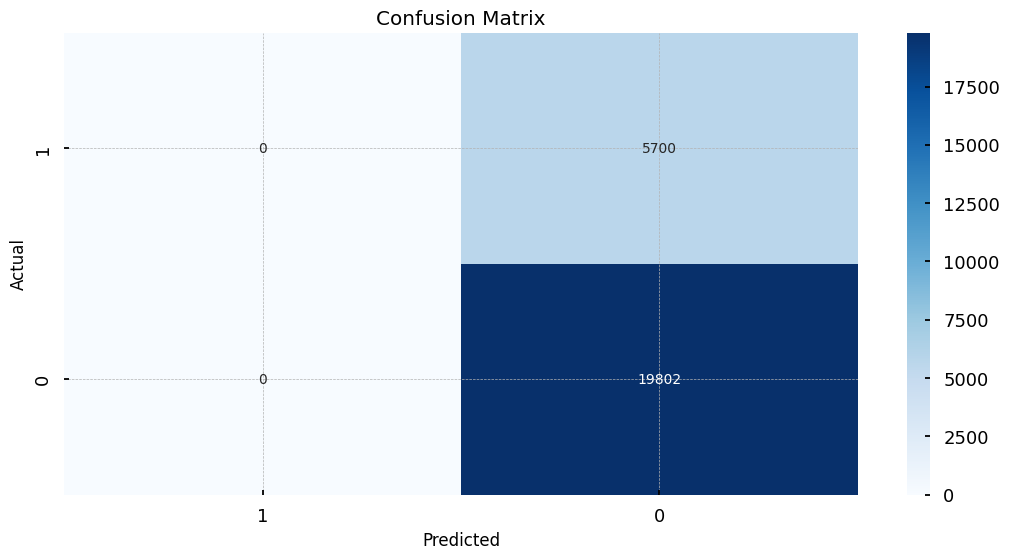

In [ ]:
### dt 모델 ##
model1 = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 1)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
actual_classes, predicted_classes, _ = cross_val_predict(model1, kfold, X_train_scaled.to_numpy(), y_train.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1, 0])

In [ ]:
## dt cv results ##
cv_results = cross_val_score(model1, X, y, cv=kfold, scoring='accuracy', verbose=0)
print(cv_results, cv_results.mean())

[0.77564637 0.76747289 0.77964971 0.7706422  0.76676677] 0.7720355885493501


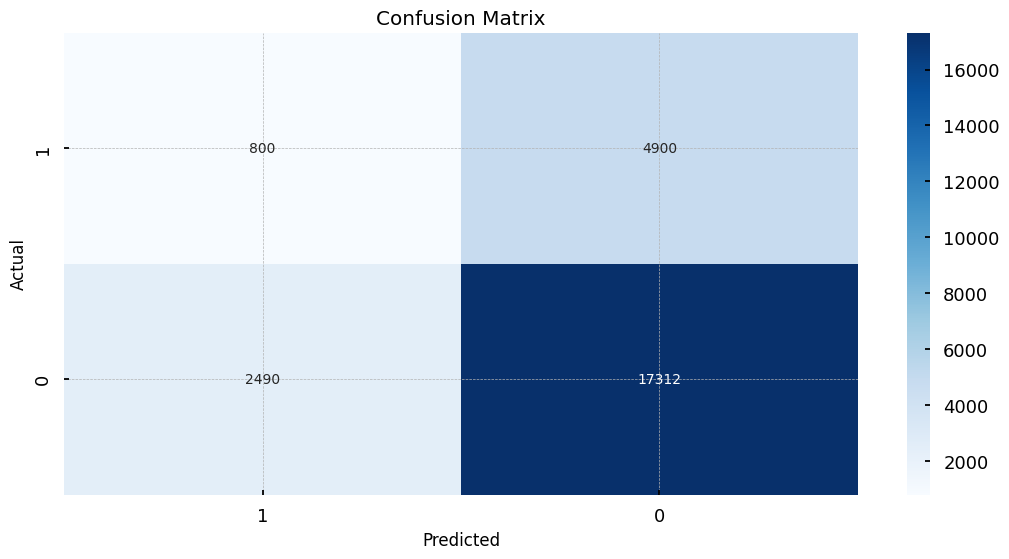

In [ ]:
## knn 모델 1 ##
model2 = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', weights = 'uniform')
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
actual_classes, predicted_classes, _ = cross_val_predict(model2, kfold, X_train_scaled.to_numpy(), y_train.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1, 0])

In [ ]:
## knn cv results ##
cv_results = cross_val_score(model2, X, y, cv=kfold, scoring='accuracy', verbose=0)
print(cv_results, cv_results.mean())

[0.73477898 0.7145955  0.73127606 0.72260217 0.71738405] 0.7241273522619088


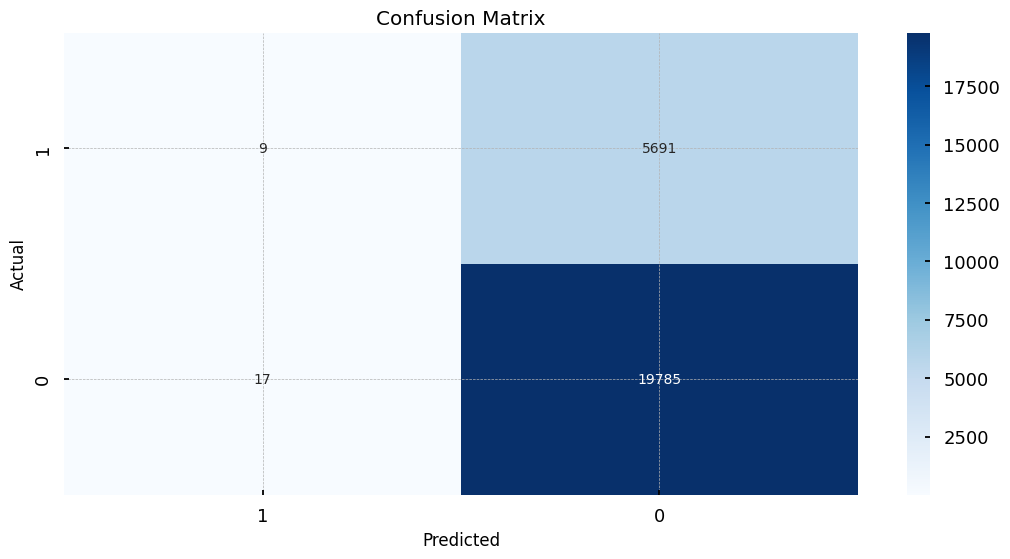

In [ ]:
## knn 모델 2 ##
model2 = KNeighborsClassifier(n_neighbors = 30, metric = 'euclidean', weights = 'uniform')
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
actual_classes, predicted_classes, _ = cross_val_predict(model2, kfold, X_train_scaled.to_numpy(), y_train.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1, 0])

In [ ]:
## knn cv results ##
cv_results = cross_val_score(model2, X, y, cv=kfold, scoring='accuracy', verbose=0)
print(cv_results, cv_results.mean())

[0.77581318 0.76747289 0.77714762 0.76930776 0.76609943] 0.7711681767950881


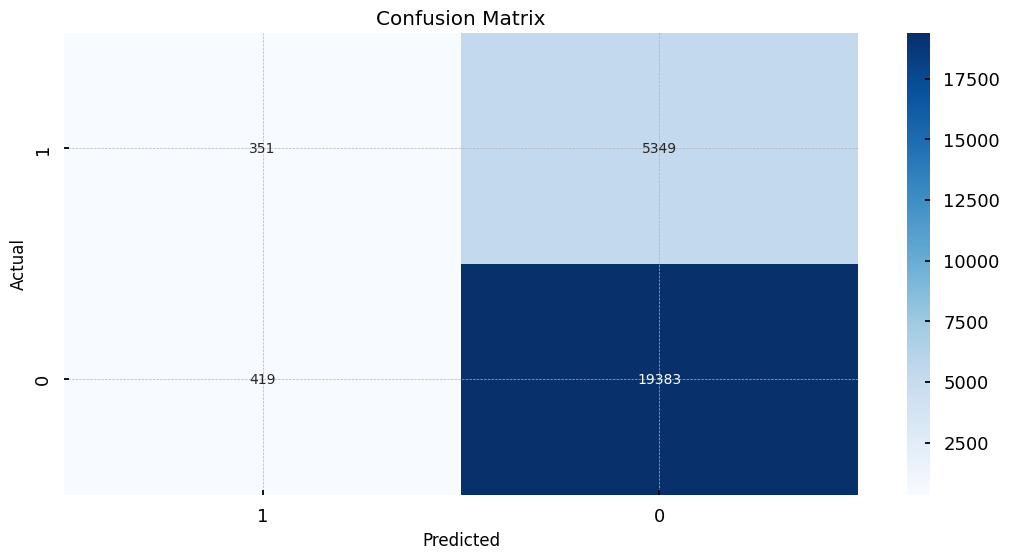

In [ ]:
## rf model ##
model3 = RandomForestClassifier(max_depth=15, n_estimators=5,bootstrap = False, max_features = 'sqrt',
                             random_state=RANDOM_STATE)

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
actual_classes, predicted_classes, _ = cross_val_predict(model3, kfold, X_train_scaled.to_numpy(), y_train.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [1, 0])

In [ ]:
## rf cv results ##
cv_results = cross_val_score(model3, X, y, cv=kfold, scoring='accuracy', verbose=0)
print(cv_results, cv_results.mean())

[0.77264387 0.76396997 0.77097581 0.76797331 0.76326326] 0.7677652464808429
